# Linear Gaussian test  
deismic

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import sbi.simulators as simulators
import sbi.utils as utils

from torch import distributions
from sbi.inference.snpe.snpe_c import APT
import numpy as np

# use cpu by default
torch.set_default_tensor_type("torch.FloatTensor")

# seed the simulations
torch.manual_seed(0)

## Create NN instance

In [3]:
dim, std = 3, 0.5
simulator = simulators.TwoMoonsSimulator()
a = 1
prior = distributions.Uniform(low=-a * torch.ones(simulator.parameter_dim), high=a * torch.ones(simulator.parameter_dim))

In [4]:
true_observation = torch.tensor([[0, 0]])
ground_truth_parameters = torch.tensor([0, 0])

In [6]:
neural_posterior = utils.get_sbi_posterior(
    model='maf',
    prior=prior,
    context=true_observation,
)

In [7]:
apt = APT(
    simulator=simulator,
    true_observation=true_observation,
    prior=prior,
    num_atoms=10,
    density_estimator=neural_posterior,
    z_score_obs=True,
    use_combined_loss=False,
    retrain_from_scratch_each_round=False,
    discard_prior_samples=False,
)

### Run inference

In [8]:
num_rounds, num_simulations_per_round = 2, [800, 500]
apt.run_inference(
    num_rounds=num_rounds, num_simulations_per_round=num_simulations_per_round, batch_size=50
)

  0%|          | 0/2 [00:00<?, ?it/s]/home/michael/anaconda3/envs/sbi/lib/python3.8/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
-------------------------00<01:00, 60.48s/it]
||||| ROUND 1 STATS |||||:
-------------------------
Epochs trained: 142
Best validation performance: 1.2356

-------------------------1:00<01:00, 60.48s/it]
||||| ROUND 1 STATS |||||:
-------------------------
Epochs trained: 142
Best validation performance: 1.2356

-------------------------1:30<00:00, 51.49s/it]
||||| ROUND 1 STATS |||||:
-------------------------
Epochs trained: 142
Best validation performance: 1.2356

: 100%|██████████| 2/2 [01:30<00:00, 45.50s/it]


### Draw samples and plot hist

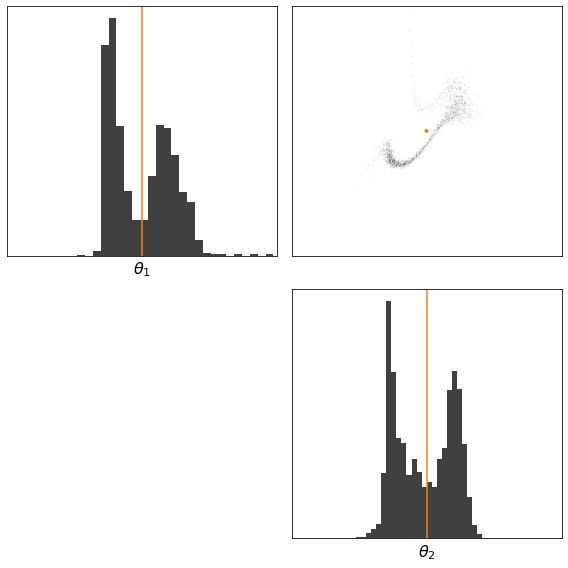

In [9]:
samples = apt._neural_posterior.sample(2500)
samples = utils.tensor2numpy(samples)
figure = utils.plot_hist_marginals(
    data=samples,
    ground_truth=utils.tensor2numpy(ground_truth_parameters).reshape(-1),
    lims=simulator.parameter_plotting_limits,
)